#Coding Assignment 9

###*Neural Networks*
###*Author: Sreehari Sreenath*
### Ref: [Boston Housing Dataset](https://www.kaggle.com/vikrishnan/boston-house-prices) 



In [ ]:
# Importing the libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


##Load File 

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# Importing the dataset and setting coulmn names 
dataset = pd.read_csv('/content/sample_data/housing.csv', header=None, delim_whitespace=True, names=column_names) 
# split into input (X) and output (Y) variables
X = dataset.iloc[:,0:13]
Y = dataset.iloc[:,13]

## Understanding the Data 

In [14]:
print(dataset.describe())

             CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]


In [15]:
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [16]:
print(dataset.shape)

(506, 14)


### Visualizing the data

In [ ]:
for column in column_names:
  plt.figure()
  sns.scatterplot(data = dataset, x=column, y='MEDV')

### Getting the correlation between each feature in the dataset
[Reference link for heatmap generation](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07)

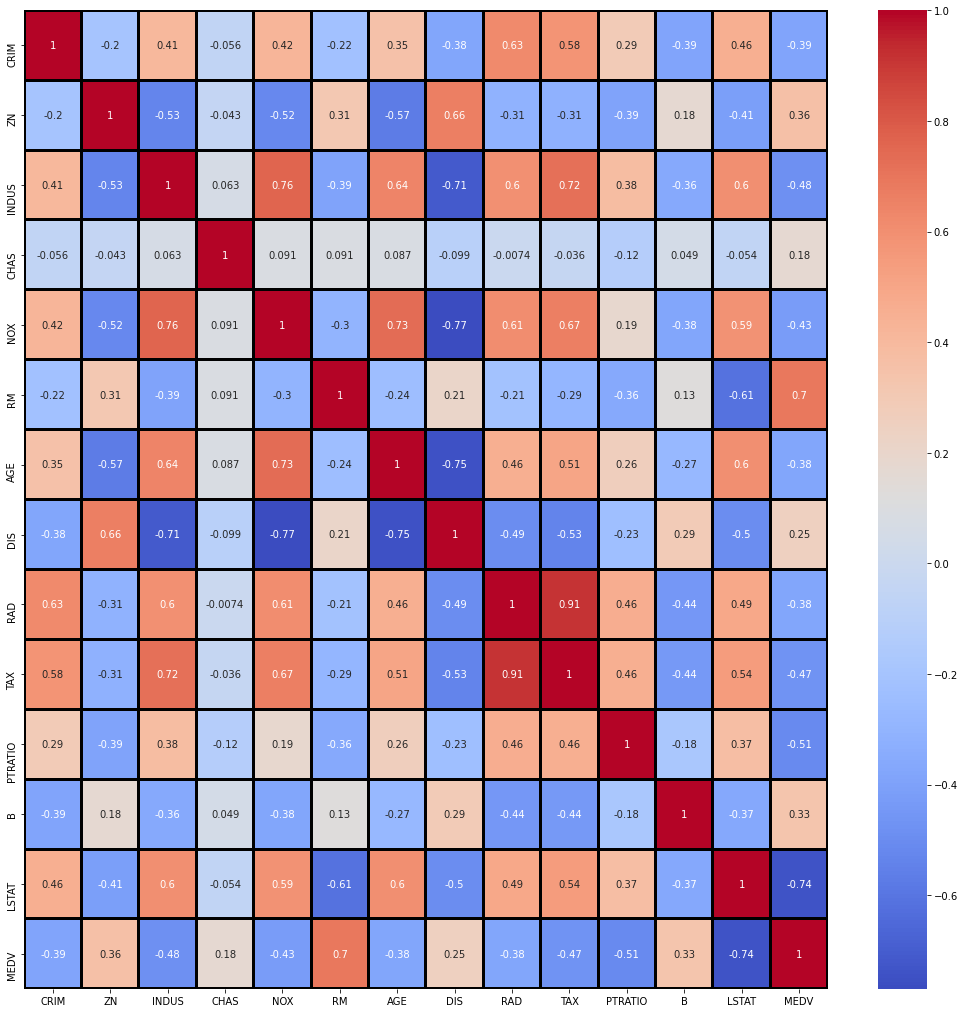

In [30]:
correlation_matrix = dataset.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(18,18))
#plot heat map
Heat_map = sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="coolwarm",
                        linewidths=2, linecolor='black', cbar_kws= {'orientation': 'horizontal'})


## Defining the baseline Model

In [31]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

## Evaluting the Model

In [32]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -28.95 (22.50) MSE


## Evaluate model with standardized dataset

In [33]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -27.66 (28.95) MSE
